In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Seed for reproducibility
np.random.seed(42)

# 1. Generate a Synthetic Time Series Dataset
date_rng = pd.date_range(start='2020-01-01', end='2023-01-01', freq='M')
data = np.sin(2 * np.pi * date_rng.month / 12) + np.random.normal(0, 0.3, len(date_rng)) + 10
df = pd.DataFrame({'Date': date_rng, 'Value': data})
df.set_index('Date', inplace=True)

# Introduce some missing values and outliers
df.loc['2020-06-30'] = np.nan  # Missing value
df.loc['2021-06-30'] = 15      # Outlier

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6368\846324420.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2020-01-01', end='2023-01-01', freq='M')


In [2]:
df

,Value
Date,
2020-01-31,10.649014
2020-02-29,10.824546
2020-03-31,11.194307
2020-04-30,11.322934
2020-05-31,10.429754
2020-06-30,NaN
2020-07-31,9.973764
2020-08-31,9.364205
2020-09-30,8.859158


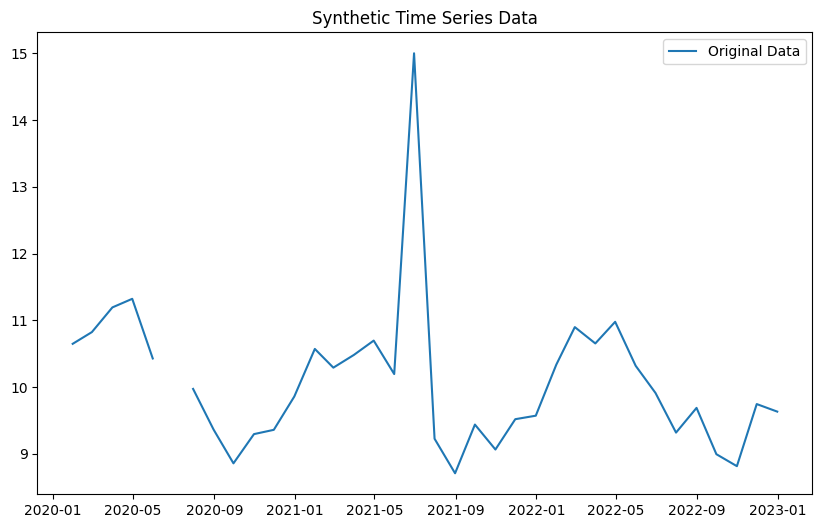

In [3]:
# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(df, label="Original Data")
plt.title("Synthetic Time Series Data")
plt.legend()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6368\695915026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6368\695915026.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Value'].fillna(method='ffill', inplace=True)  # Forward fill


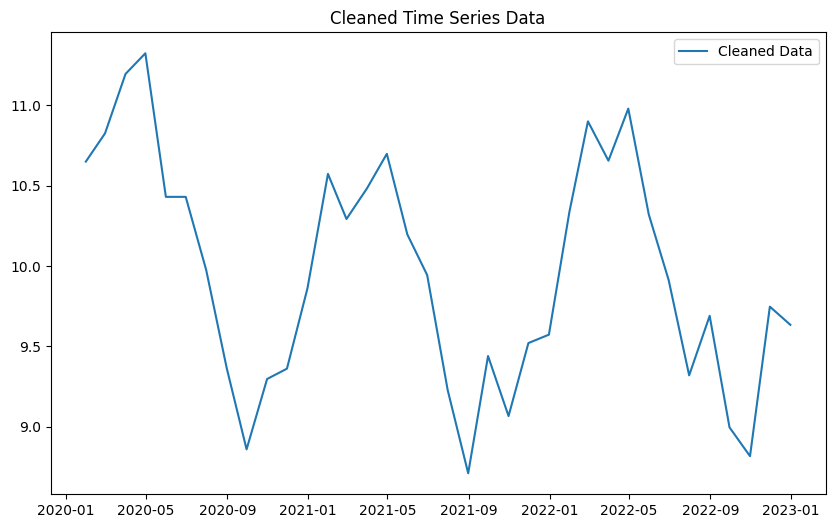

In [4]:
# 2. Handle Missing Values
df['Value'].fillna(method='ffill', inplace=True)  # Forward fill

# 3. Handle Outliers (Cap or Remove)
q1 = df['Value'].quantile(0.25)
q3 = df['Value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with median
df['Value'] = np.where(
    (df['Value'] < lower_bound) | (df['Value'] > upper_bound),
    df['Value'].median(),
    df['Value']
)

# Plot cleaned data
plt.figure(figsize=(10, 6))
plt.plot(df, label="Cleaned Data")
plt.title("Cleaned Time Series Data")
plt.legend()
plt.show()

In [5]:
# 4. Moving Average
window_size = 3     #--> window_size

df['Moving_Avg'] = df['Value'].rolling(window = window_size).mean()

In [6]:
# 5. Double Exponential Smoothing
alpha = 0.5  # Smoothing level
beta = 0.3   # Smoothing slope
model_des = ExponentialSmoothing(df['Value'], trend="add", seasonal=None)
fit_des = model_des.fit(smoothing_level=alpha, smoothing_slope=beta)

df['Double_Exp_Smoothing'] = fit_des.fittedvalues

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6368\174018297.py:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit_des = model_des.fit(smoothing_level=alpha, smoothing_slope=beta)


In [7]:
df['Double_Exp_Smoothing']

Date
2020-01-31    11.017296
2020-02-29    10.672171
2020-03-31    10.610231
2020-04-30    10.851753
2020-05-31    11.107505
2020-06-30    10.687128
2020-07-31    10.438333
2020-08-31    10.016256
2020-09-30     9.402630
2020-10-31     8.761772
2020-11-30     8.740382
2020-12-31     8.854891
2021-01-31     9.312608
2021-02-28    10.086617
2021-03-31    10.364162
2021-04-30    10.615930
2021-05-31    10.861433
2021-06-30    10.633798
2021-07-31    10.289868
2021-08-31     9.600795
2021-09-30     8.864027
2021-10-31     8.946698
2021-11-30     8.819239
2021-12-31     9.087671
2022-01-31     9.320781
2022-02-28     9.971777
2022-03-31    10.717712
2022-04-30    10.958928
2022-05-31    11.244523
2022-06-30    10.919150
2022-07-31    10.401807
2022-08-31     9.684286
2022-09-30     9.511416
2022-10-31     9.000807
2022-11-30     8.628237
2022-12-31     9.074781
Name: Double_Exp_Smoothing, dtype: float64

In [8]:
# 6. Triple Exponential Smoothing
seasonal_periods = 12  # Monthly seasonality
model_tes = ExponentialSmoothing(df['Value'], trend="add", seasonal="add", seasonal_periods=seasonal_periods)
# fit_tes = model_tes.fit()


fit_tes = model_tes.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=seasonal_periods)
df['Triple_Exp_Smoothing'] = fit_tes.fittedvalues


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6368\894772070.py:7: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit_tes = model_tes.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=seasonal_periods)


In [9]:
df['Triple_Exp_Smoothing']

Date
2020-01-31    10.618565
2020-02-29    10.838770
2020-03-31    11.224227
2020-04-30    11.348393
2020-05-31    10.421773
2020-06-30    10.444872
2020-07-31    10.015386
2020-08-31     9.409055
2020-09-30     8.790423
2020-10-31     9.300882
2020-11-30     9.334998
2020-12-31     9.875644
2021-01-31    10.586501
2021-02-28    10.233161
2021-03-31    10.462483
2021-04-30    10.668342
2021-05-31    10.181566
2021-06-30     9.943115
2021-07-31     9.217743
2021-08-31     8.620736
2021-09-30     9.474800
2021-10-31     9.085755
2021-11-30     9.498181
2021-12-31     9.564814
2022-01-31    10.332128
2022-02-28    10.891779
2022-03-31    10.651910
2022-04-30    10.976577
2022-05-31    10.319366
2022-06-30     9.912800
2022-07-31     9.319079
2022-08-31     9.686078
2022-09-30     9.000775
2022-10-31     8.817981
2022-11-30     9.745309
2022-12-31     9.633476
Name: Triple_Exp_Smoothing, dtype: float64

In [10]:
# 7. Evaluation Metrics

def calculate_metrics(true_values, predicted_values):
    true_values = true_values.dropna()
    predicted_values = predicted_values.dropna()

    errors = true_values - predicted_values
    mape = np.mean(np.abs(errors / true_values)) * 100  # Mean Absolute Percentage Error
    mad = np.mean(np.abs(errors))                      # Mean Absolute Deviation
    msd = np.mean(errors ** 2)                         # Mean Squared Deviation
    return mape, mad, msd

# Calculate metrics for each method
metrics = {
    'Method': [],
    'MAPE': [],
    'MAD': [],
    'MSD': []
}

methods = {
    'Moving Average': df['Moving_Avg'],
    'Double Exponential Smoothing': df['Double_Exp_Smoothing'],
    'Triple Exponential Smoothing': df['Triple_Exp_Smoothing']
}

for method_name, predicted_values in methods.items():
    mape, mad, msd = calculate_metrics(df['Value'], predicted_values)
    metrics['Method'].append(method_name)
    metrics['MAPE'].append(mape)
    metrics['MAD'].append(mad)
    metrics['MSD'].append(msd)

# Display evaluation results
metrics_df = pd.DataFrame(metrics)
print("Evaluation Metrics:")
print(metrics_df)

Evaluation Metrics:
                         Method      MAPE       MAD       MSD
0                Moving Average  3.298314  0.323382  0.141113
1  Double Exponential Smoothing  5.816516  0.572487  0.450821
2  Triple Exponential Smoothing  0.192192  0.018715  0.000775


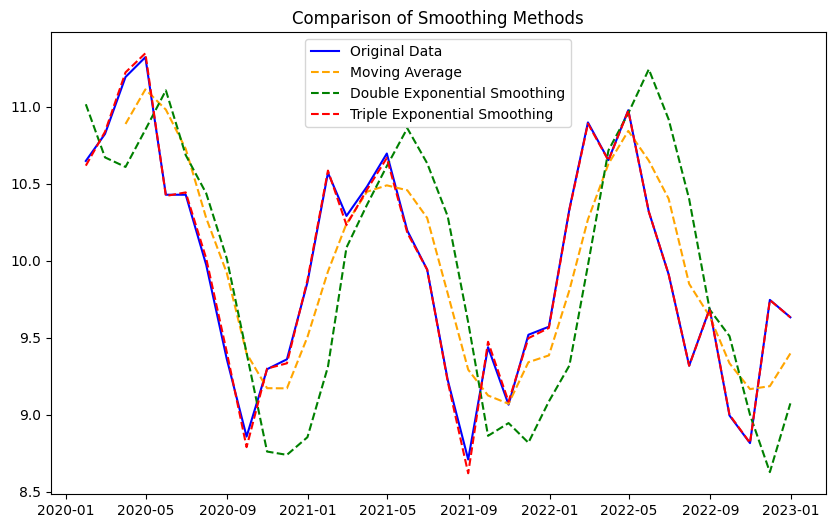

In [11]:
# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label="Original Data", color='blue')
plt.plot(df['Moving_Avg'], label="Moving Average", color='orange', linestyle='--')
plt.plot(df['Double_Exp_Smoothing'], label="Double Exponential Smoothing", color='green', linestyle='--')
plt.plot(df['Triple_Exp_Smoothing'], label="Triple Exponential Smoothing", color='red', linestyle='--')
plt.title("Comparison of Smoothing Methods")
plt.legend()
plt.show()


Forecasts for Next 6 Periods:
            Moving_Avg_Forecast  Double_Exp_Forecast  Triple_Exp_Forecast
Date                                                                     
2023-01-31             9.399057             9.325390            10.361105
2023-02-28             9.399057             9.296516            10.955894
2023-03-31             9.399057             9.267642            10.656191
2023-04-30             9.399057             9.238769            10.972131
2023-05-31             9.399057             9.209895            10.293216
2023-06-30             9.399057             9.181021             9.877306


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6368\1860384476.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='M')


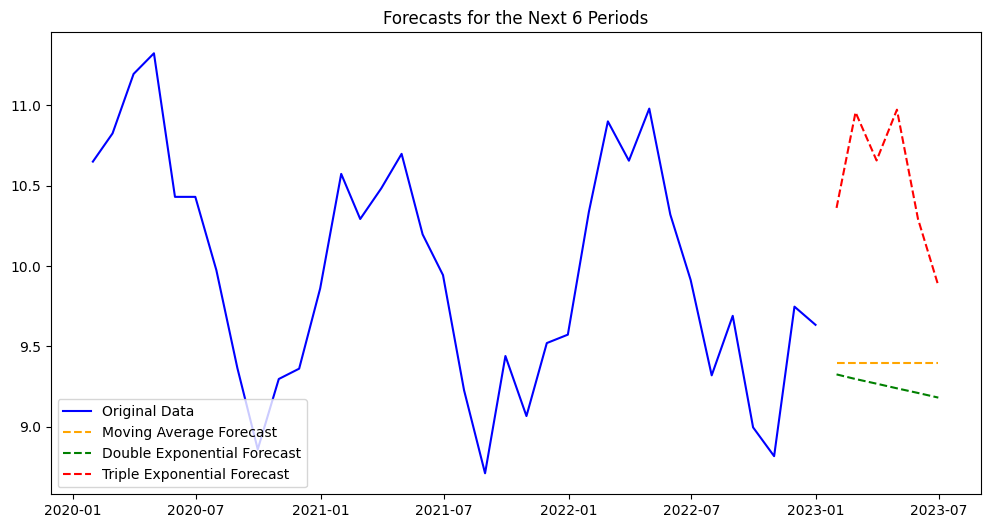

In [12]:
# 8. Forecasting for Next 6 Periods

forecast_periods = 6
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='M')

# Moving Average Forecast
moving_avg_forecast = [df['Value'][-window_size:].mean()] * forecast_periods

# Double Exponential Smoothing Forecast
double_exp_forecast = fit_des.forecast(steps=forecast_periods)

# Triple Exponential Smoothing Forecast
triple_exp_forecast = fit_tes.forecast(steps=forecast_periods)

# Combine Forecasts into a DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Moving_Avg_Forecast': moving_avg_forecast,
    'Double_Exp_Forecast': double_exp_forecast,
    'Triple_Exp_Forecast': triple_exp_forecast
})
forecast_df.set_index('Date', inplace=True)

print("\nForecasts for Next 6 Periods:")
print(forecast_df)


# Plot Forecast Results
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label="Original Data", color='blue')
plt.plot(forecast_df['Moving_Avg_Forecast'], label="Moving Average Forecast", linestyle='--', color='orange')
plt.plot(forecast_df['Double_Exp_Forecast'], label="Double Exponential Forecast", linestyle='--', color='green')
plt.plot(forecast_df['Triple_Exp_Forecast'], label="Triple Exponential Forecast", linestyle='--', color='red')
plt.title("Forecasts for the Next 6 Periods")
plt.legend()
plt.show()

In [13]:
# Save dataset and metrics as CSV (optional)
df.to_csv('synthetic_time_series.csv')
metrics_df.to_csv('evaluation_metrics.csv', index=False)